In [ ]:
import torch  # this is the baseline functionality of Pytorch
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
from torchvision import datasets # a module that let's you load popular datasets
                                 # for training a neural network

In [ ]:
import torchvision.transforms as transforms  # The data in datasets is not
                                  # always in the format we need. This module
                                  #let's you easily modify

import torchvision.utils as vision_utils  # submodule with useful functions for
                                  # handling images

import torch.optim as optim  # submodule wiht different otimization (or learning)
                            # algorithms

In [ ]:
# Each sample in the dataset is a tuple (image:PIL[1,28,28],label:int)
train_ds = datasets.MNIST('../data', train=True, download=True)
test_ds = datasets.MNIST('../data', train=False, download=True)

In [ ]:
print(train_ds)
print(type(train_ds))

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
<class 'torchvision.datasets.mnist.MNIST'>


In [ ]:
print('The number of images in the set is:')
print(len(train_ds))

print('The type of the first element in train_ds is:')
print(type(train_ds[0]))

The number of images in the set is:
60000
The type of the first element in train_ds is:
<class 'tuple'>


In [ ]:
print('The number of elements in the first tuple of train_ds is:')
print(len(train_ds[0]))

print('\nThe first element in the first tuple of train_ds is of type:')  # "\n" prints a space before
print(type(train_ds[0][0]))

print('\nThe second element in the first tuple of train_ds is of type:') # "\n" prints a space before
print(type(train_ds[0][1]))

The number of elements in the first tuple of train_ds is:
2

The first element in the first tuple of train_ds is of type:
<class 'PIL.Image.Image'>

The second element in the first tuple of train_ds is of type:
<class 'int'>


In [ ]:
transform = transforms.ToTensor()

train_ds.transform =transform
test_ds.transform = transform

print('The new type of the first image in train_ds is')
print(type(train_ds[0][0]))

The new type of the first image in train_ds is
<class 'torch.Tensor'>


In [ ]:
print('The type of the first image in the train dataset is: ')
print(type(train_ds[0][0]))  # first tuple of the dataset, first element of the tuple

print('\nThe shape attribute of the image Tensor of the train dataset is: ')
print(train_ds[0][0].shape)

The type of the first image in the train dataset is: 
<class 'torch.Tensor'>

The shape attribute of the image Tensor of the train dataset is: 
torch.Size([1, 28, 28])


In [ ]:
image0 = train_ds[0][0]  # first tuple in the dataset, first element in the tuple
print(type(image0))
print(image0.shape)

print('The first row of the image is:')
print(image0[0,0,0:28])  # first channel, first row, columns 0 to 27 (because
                         # the last index is not included in the range construct
                         # begin:end)

print('The first column of the image is:')
print(image0[0,0:28,0])  # first channel, rows 0 to 27, first column


<class 'torch.Tensor'>
torch.Size([1, 28, 28])
The first row of the image is:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])
The first column of the image is:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])


In [ ]:
import torch.utils as utils  # note that you can import anywhere in your
                                      # code as long as you do it before you use
                                      # the module

batch_size=32  # numer of elements to retrieve at once from the dataset

train_loader = utils.data.DataLoader(train_ds, # dataset to get the data from
                                    batch_size=batch_size,
                                    shuffle=True)
# note that you can use multi-line statements in python

test_loader = utils.data.DataLoader(test_ds,
                                   batch_size=batch_size,
                                   shuffle=True)


So let's get a batch of images and labels from **train_loader** using its iterator:

In [ ]:
print('The number of batches in the loader should be:')
print(60000/32)

print('and it actually is:')
print(len(train_loader))  # the loader class allows using python's len()

# get an image from the loader
loader_iterator = iter(train_loader)
images, labels = next(loader_iterator)

print('The shape of the images batch Tensor is')
print(images.shape)

The number of batches in the loader should be:
1875.0
and it actually is:
1875
The shape of the images batch Tensor is
torch.Size([32, 1, 28, 28])


In [ ]:
n_batches = 10
C = 3
H = 28
W = 28
total_pxs = C*H*W
shape = (n_batches, C, H, W)  # shape is a python tuple

rand_image = torch.rand(shape)  # rand returns a tensor of the given shape

print(f'our random image is of shape: {rand_image.shape}')
print(f'the flattened image should be of shape [{n_batches}, {total_pxs}]')

our random image is of shape: torch.Size([10, 3, 28, 28])
the flattened image should be of shape [10, 2352]


In [ ]:
a_flatten_layer = torch.nn.Flatten(start_dim=1)
flattened_image = a_flatten_layer(rand_image)
print(f'our flattened image is of shape: {flattened_image.shape}')

our flattened image is of shape: torch.Size([10, 2352])


In [ ]:
N = 15  # number of neurons in the layer. Also, the number of outputs of the layer
a_linear_layer = torch.nn.Linear(total_pxs,N)
output = a_linear_layer(flattened_image)

print('The shape of the output tensor is:')
print(output.shape)

print('The shape of the weights tensor is [N, total_pxs]:')
print(a_linear_layer.weight.shape)

The shape of the output tensor is:
torch.Size([10, 15])
The shape of the weights tensor is [N, total_pxs]:
torch.Size([15, 2352])


In [ ]:
C = 1  # monochromatic images
H = 28  # 28 pixels per side
W = 28  # 28 pixels per side

n_inputs = C*H*W  # total number of inputs is the total number of pixels
N1 = 800  # number of neurons in layer 1, the input layer
n_outputs = 10  # number of neurons at layer 2, the output layer

# let's build our network using a Sequential container
net = torch.nn.Sequential(
            torch.nn.Flatten(start_dim=1),  # start at 2nd dim to preserve the batch dim
            torch.nn.Linear(n_inputs, N1),  # n_inputs connecting to N1 neurons
            torch.nn.Linear(N1, n_outputs), # N1 outputs from last layer are inputs to this layer with n_outputs neurons
        )

In [ ]:
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
optimizer = optim.SGD(net.parameters(), lr=0.001)

[0,     0] loss: 2.301
[0,   100] loss: 2.213
[0,   200] loss: 2.200
[0,   300] loss: 2.106
[0,   400] loss: 2.035
[0,   500] loss: 1.868
[0,   600] loss: 1.937
[0,   700] loss: 1.843
[0,   800] loss: 1.788
[0,   900] loss: 1.723
[0,  1000] loss: 1.784
[0,  1100] loss: 1.601
[0,  1200] loss: 1.540
[0,  1300] loss: 1.566
[0,  1400] loss: 1.385
[0,  1500] loss: 1.401
[0,  1600] loss: 1.457
[0,  1700] loss: 1.378
[0,  1800] loss: 1.355
[1,     0] loss: 1.383
[1,   100] loss: 1.289
[1,   200] loss: 1.266
[1,   300] loss: 1.056
[1,   400] loss: 1.167
[1,   500] loss: 1.245
[1,   600] loss: 1.086
[1,   700] loss: 1.032
[1,   800] loss: 0.972
[1,   900] loss: 0.927
[1,  1000] loss: 0.988
[1,  1100] loss: 1.150
[1,  1200] loss: 0.958
[1,  1300] loss: 1.036
[1,  1400] loss: 0.857
[1,  1500] loss: 0.889
[1,  1600] loss: 1.012
[1,  1700] loss: 0.846
[1,  1800] loss: 1.011
[2,     0] loss: 0.922
[2,   100] loss: 1.011
[2,   200] loss: 0.710
[2,   300] loss: 0.816
[2,   400] loss: 0.648
[2,   500] 

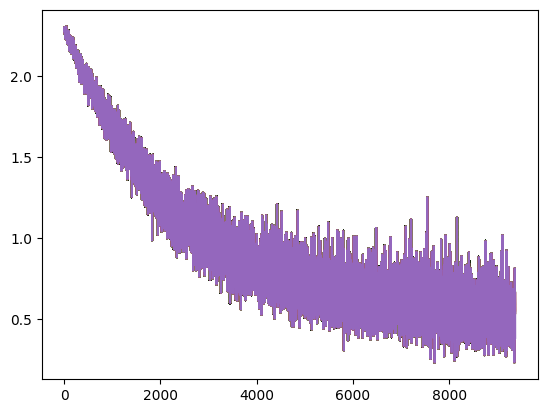

In [ ]:
red01=[]
n_epochs = 5  # number of epochs we want to train
for epoch in range(n_epochs):  # range(int_x) converts an integer into a list from 0 to int_x
    for batch_idx, data in enumerate(train_loader):  # consume the dataset, one batch at a time
        # get the inputs; data is a tuple of (inputs, labels)
        inputs, labels = data

        # zero the parameter gradients to get the gradient per batch
        optimizer.zero_grad()

        # do a forward pass
        outputs = net(inputs)

        # compute the loss
        loss = criterion(outputs, labels)

        # do the backpropagation
        loss.backward()  # backward is an attribute of every tensor.
                         # Thus, you can compute the gradient on any tensor that
                         # that results from any differentiable operation.

        # Let the parameters with the optimizer
        optimizer.step()

        # print statistics
        if batch_idx % 100 == 0:    # print every 100 mini-batches
          print(f'[{epoch}, {batch_idx:5d}] loss: {loss.item():.3f}')
        red01.append(loss.item())
        plt.plot(red01)
        plt.show
        model = torch.save(net, 'model1.pth')

In [ ]:
preds_hist=[]
exp_hist=[]
MC=torch.zeros(10,10)
for batch_idx, data in enumerate(test_loader):  # consume the dataset, one batch at a time
        # get the inputs; data is a tuple of (inputs, labels)
        inputs, labels = data

        # do a forward pass
        outputs = net(inputs)

        preds=torch.argmax(outputs,dim=1)
        preds_hist.append(preds.detach())
        exp_hist.append(labels.detach())

for i in range(len(preds_hist)):
  for j in range(len(exp_hist[i])):
    MC[preds_hist[i][j], exp_hist[i][j]]+=1

In [ ]:
MC
conf_matrix = MC
conf_df = pd.DataFrame(conf_matrix)
conf_df.to_csv("confusion_matrix1.csv", index=False)
MC

tensor([[9.4700e+02, 0.0000e+00, 1.4000e+01, 6.0000e+00, 2.0000e+00, 2.4000e+01,
         2.2000e+01, 4.0000e+00, 9.0000e+00, 1.3000e+01],
        [0.0000e+00, 1.0950e+03, 2.2000e+01, 1.0000e+00, 8.0000e+00, 1.2000e+01,
         3.0000e+00, 3.1000e+01, 1.2000e+01, 1.1000e+01],
        [3.0000e+00, 6.0000e+00, 8.6100e+02, 2.1000e+01, 6.0000e+00, 5.0000e+00,
         1.6000e+01, 2.6000e+01, 1.4000e+01, 8.0000e+00],
        [2.0000e+00, 5.0000e+00, 2.4000e+01, 8.8100e+02, 0.0000e+00, 6.0000e+01,
         2.0000e+00, 1.0000e+00, 4.6000e+01, 1.1000e+01],
        [0.0000e+00, 1.0000e+00, 1.9000e+01, 1.0000e+00, 8.7100e+02, 1.9000e+01,
         1.7000e+01, 1.5000e+01, 1.2000e+01, 4.9000e+01],
        [8.0000e+00, 1.0000e+00, 0.0000e+00, 3.6000e+01, 1.0000e+00, 6.7600e+02,
         1.9000e+01, 0.0000e+00, 2.3000e+01, 1.4000e+01],
        [1.5000e+01, 4.0000e+00, 2.9000e+01, 7.0000e+00, 1.5000e+01, 2.7000e+01,
         8.7200e+02, 0.0000e+00, 1.7000e+01, 1.0000e+00],
        [1.0000e+00, 0.0000

Suma de la matriz de confusion:  tensor(10000.)


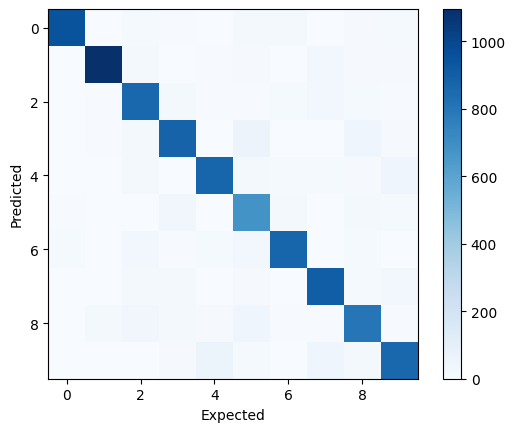

<Figure size 640x480 with 0 Axes>

In [ ]:
sum_MC = torch.sum(MC)
print("Suma de la matriz de confusion: ", sum_MC)
plt.imshow(MC, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()
plt.savefig("Modelo1.jpg")

# **2do Red Neuronal**

[0,     0] loss: 2.312
[0,   100] loss: 2.242
[0,   200] loss: 2.145
[0,   300] loss: 2.067
[0,   400] loss: 2.042
[0,   500] loss: 1.977
[0,   600] loss: 1.857
[0,   700] loss: 1.828
[0,   800] loss: 1.750
[0,   900] loss: 1.761
[0,  1000] loss: 1.655
[0,  1100] loss: 1.539
[0,  1200] loss: 1.488
[0,  1300] loss: 1.451
[0,  1400] loss: 1.513
[0,  1500] loss: 1.334
[0,  1600] loss: 1.452
[0,  1700] loss: 1.380
[0,  1800] loss: 1.134
[1,     0] loss: 1.317
[1,   100] loss: 1.349
[1,   200] loss: 1.178
[1,   300] loss: 1.172
[1,   400] loss: 1.045
[1,   500] loss: 1.094
[1,   600] loss: 1.265
[1,   700] loss: 1.119
[1,   800] loss: 1.206
[1,   900] loss: 0.997
[1,  1000] loss: 1.020
[1,  1100] loss: 0.897
[1,  1200] loss: 0.823
[1,  1300] loss: 0.820
[1,  1400] loss: 0.745
[1,  1500] loss: 0.990
[1,  1600] loss: 0.958
[1,  1700] loss: 0.879
[1,  1800] loss: 0.844
[2,     0] loss: 0.806
[2,   100] loss: 0.720
[2,   200] loss: 0.766
[2,   300] loss: 0.967
[2,   400] loss: 0.648
[2,   500] 

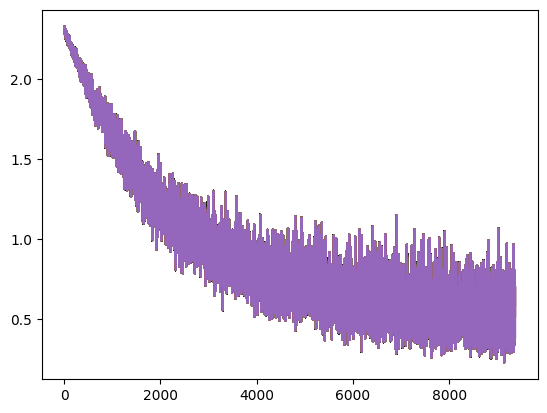

In [ ]:
#2da RED NEURONAL A ENTRENAR
C1 = 1  # monochromatic images
H1 = 28  # 28 pixels per side
W1 = 28  # 28 pixels per side

n_inputs1 = C1*H1*W1  # total number of inputs is the total number of pixels
N11 = 1000  # number of neurons in layer 1, the input layer
n_outputs1 = 10  # number of neurons at layer 2, the output layer

# let's build our network using a Sequential container
net1 = torch.nn.Sequential(
            torch.nn.Flatten(start_dim=1),  # start at 2nd dim to preserve the batch dim
            torch.nn.Linear(n_inputs1, N11),  # n_inputs connecting to N1 neurons
            torch.nn.Linear(N11, n_outputs1), # N1 outputs from last layer are inputs to this layer with n_outputs neurons
        )

#Criterio de 2da RED NEURONAL
criterion2 = torch.nn.CrossEntropyLoss()

#Optimizador de 2da RED NEURONAL
optimizer1 = optim.SGD(net1.parameters(), lr=0.001)

#Entrenamiento 2da red neuronal
red02=[]
n_epochs2 = 5  # number of epochs we want to train
for epoch in range(n_epochs2):  # range(int_x) converts an integer into a list from 0 to int_x
    for batch_idx, data in enumerate(train_loader):  # consume the dataset, one batch at a time
        # get the inputs; data is a tuple of (inputs, labels)
        inputs, labels = data

        # zero the parameter gradients to get the gradient per batch
        optimizer1.zero_grad()

        # do a forward pass
        outputs = net1(inputs)

        # compute the loss
        loss = criterion2(outputs, labels)

        # do the backpropagation
        loss.backward()  # backward is an attribute of every tensor.
                         # Thus, you can compute the gradient on any tensor that
                         # that results from any differentiable operation.

        # Let the parameters with the optimizer
        optimizer1.step()

        # print statistics
        if batch_idx % 100 == 0:    # print every 100 mini-batches
          print(f'[{epoch}, {batch_idx:5d}] loss: {loss.item():.3f}')
        red02.append(loss.item())
        plt.plot(red02)
        plt.show
        model2 = torch.save(net1, 'model2.pth')

In [ ]:

preds_hist1=[]
exp_hist1=[]
MC1=torch.zeros(10,10)
for batch_idx, data in enumerate(test_loader):  # consume the dataset, one batch at a time
        # get the inputs; data is a tuple of (inputs, labels)
        inputs, labels = data

        # do a forward pass
        outputs = net1(inputs)

        preds=torch.argmax(outputs,dim=1)
        preds_hist1.append(preds.detach())
        exp_hist1.append(labels.detach())

for i in range(len(preds_hist1)):
  for j in range(len(exp_hist1[i])):
    MC1[preds_hist1[i][j], exp_hist1[i][j]]+=1
#sum_MC1=torch.sum(MC1)
#print ("suma",sum_MC1)
MC1
conf_matrix2 = MC1
conf_df2 = pd.DataFrame(conf_matrix2)
conf_df2.to_csv("confusion_matrix2.csv", index=False)
MC1

tensor([[9.4900e+02, 0.0000e+00, 1.9000e+01, 5.0000e+00, 2.0000e+00, 2.5000e+01,
         2.0000e+01, 4.0000e+00, 9.0000e+00, 1.3000e+01],
        [0.0000e+00, 1.0950e+03, 1.9000e+01, 2.0000e+00, 7.0000e+00, 8.0000e+00,
         3.0000e+00, 2.8000e+01, 1.2000e+01, 1.0000e+01],
        [5.0000e+00, 5.0000e+00, 8.6200e+02, 1.9000e+01, 5.0000e+00, 5.0000e+00,
         1.5000e+01, 3.0000e+01, 1.2000e+01, 1.0000e+01],
        [3.0000e+00, 3.0000e+00, 2.1000e+01, 8.8800e+02, 0.0000e+00, 5.2000e+01,
         1.0000e+00, 1.0000e+00, 4.1000e+01, 1.0000e+01],
        [0.0000e+00, 1.0000e+00, 1.9000e+01, 1.0000e+00, 8.7500e+02, 2.6000e+01,
         1.5000e+01, 1.5000e+01, 1.4000e+01, 4.8000e+01],
        [7.0000e+00, 1.0000e+00, 0.0000e+00, 3.9000e+01, 1.0000e+00, 6.8700e+02,
         1.9000e+01, 0.0000e+00, 2.9000e+01, 1.6000e+01],
        [1.1000e+01, 4.0000e+00, 2.6000e+01, 5.0000e+00, 1.7000e+01, 2.5000e+01,
         8.7600e+02, 0.0000e+00, 1.7000e+01, 2.0000e+00],
        [1.0000e+00, 0.0000

Suma de la matriz de confusion:  tensor(10000.)


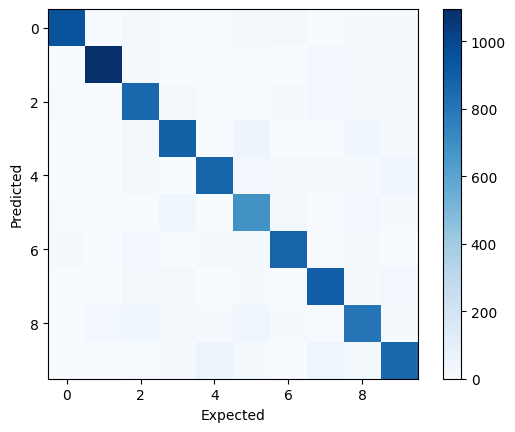

<Figure size 640x480 with 0 Axes>

In [ ]:
sum_MC1 = torch.sum(MC1)
print("Suma de la matriz de confusion: ", sum_MC1)
plt.imshow(MC1, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()
plt.savefig("Modelo2.jpg")

# **3ra Red Neuronal**

In [ ]:
#3ra RED NEURONAL A ENTRENAR
C2 = 1  # monochromatic images
H2 = 28  # 28 pixels per side
W2 = 28  # 28 pixels per side

n_inputs2 = C2*H2*W2  # total number of inputs is the total number of pixels
N12 = 700  # number of neurons in layer 1, the input layer
n_outputs2 = 10  # number of neurons at layer 2, the output layer

# let's build our network using a Sequential container
net2 = torch.nn.Sequential(
            torch.nn.Flatten(start_dim=1),  # start at 2nd dim to preserve the batch dim
            torch.nn.Linear(n_inputs2, N12),  # n_inputs connecting to N1 neurons
            torch.nn.Linear(N12, n_outputs2), # N1 outputs from last layer are inputs to this layer with n_outputs neurons
        )

#Criterio 3ra RED NEURONAL
criterion3 = torch.nn.CrossEntropyLoss()

#Optimizador de 3ra RED NEURONAL
optimizer3 = optim.SGD(net2.parameters(), lr=0.001)



[0,     0] loss: 2.325
[0,   100] loss: 2.204
[0,   200] loss: 2.113
[0,   300] loss: 2.079
[0,   400] loss: 2.022
[0,   500] loss: 1.975
[0,   600] loss: 1.959
[0,   700] loss: 1.887
[0,   800] loss: 1.755
[0,   900] loss: 1.825
[0,  1000] loss: 1.621
[0,  1100] loss: 1.595
[0,  1200] loss: 1.553
[0,  1300] loss: 1.641
[0,  1400] loss: 1.534
[0,  1500] loss: 1.517
[0,  1600] loss: 1.419
[0,  1700] loss: 1.352
[0,  1800] loss: 1.378
[1,     0] loss: 1.251
[1,   100] loss: 1.260
[1,   200] loss: 1.165
[1,   300] loss: 1.087
[1,   400] loss: 1.148
[1,   500] loss: 1.124
[1,   600] loss: 1.141
[1,   700] loss: 1.137
[1,   800] loss: 1.146
[1,   900] loss: 0.989
[1,  1000] loss: 0.875
[1,  1100] loss: 0.775
[1,  1200] loss: 1.151
[1,  1300] loss: 1.082
[1,  1400] loss: 1.065
[1,  1500] loss: 1.028
[1,  1600] loss: 0.880
[1,  1700] loss: 1.071
[1,  1800] loss: 0.928
[2,     0] loss: 0.901
[2,   100] loss: 0.735
[2,   200] loss: 0.827
[2,   300] loss: 0.961
[2,   400] loss: 0.727
[2,   500] 

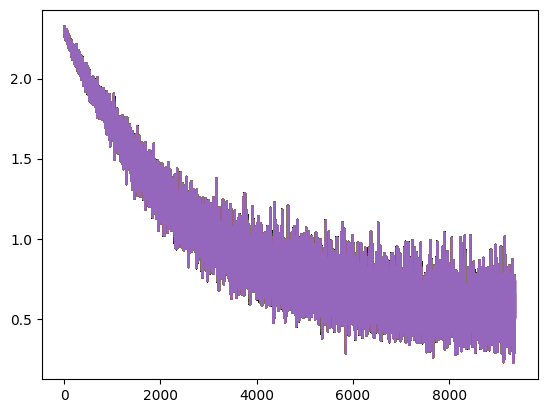

In [ ]:
#Entrenamiento 3ra red neuronal
red03=[]
n_epochs3 = 5  # number of epochs we want to train
for epoch in range(n_epochs3):  # range(int_x) converts an integer into a list from 0 to int_x
    for batch_idx, data in enumerate(train_loader):  # consume the dataset, one batch at a time
        # get the inputs; data is a tuple of (inputs, labels)
        inputs, labels = data

        # zero the parameter gradients to get the gradient per batch
        optimizer3.zero_grad()

        # do a forward pass
        outputs = net2(inputs)

        # compute the loss
        loss = criterion(outputs, labels)

        # do the backpropagation
        loss.backward()  # backward is an attribute of every tensor.
                         # Thus, you can compute the gradient on any tensor that
                         # that results from any differentiable operation.

        # Let the parameters with the optimizer
        optimizer3.step()

        # print statistics
        if batch_idx % 100 == 0:    # print every 100 mini-batches
          print(f'[{epoch}, {batch_idx:5d}] loss: {loss.item():.3f}')
        red03.append(loss.item())
        plt.plot(red03)
        plt.show
        model3 = torch.save(net2, 'model3.pth')

In [ ]:
#TEST
preds_hist2=[]
exp_hist2=[]
MC2=torch.zeros(10,10)
for batch_idx, data in enumerate(test_loader):  # consume the dataset, one batch at a time
        # get the inputs; data is a tuple of (inputs, labels)
        inputs, labels = data

        # do a forward pass
        outputs = net2(inputs)

        preds=torch.argmax(outputs,dim=1)
        preds_hist2.append(preds.detach())
        exp_hist2.append(labels.detach())

for i in range(len(preds_hist2)):
  for j in range(len(exp_hist2[i])):
    MC2[preds_hist2[i][j], exp_hist2[i][j]]+=1
#sum_MC2=torch.sum(MC2)
#print ("suma",sum_MC2)
MC2
conf_matrix3 = MC2
conf_df3 = pd.DataFrame(conf_matrix3)
conf_df3.to_csv("confusion_matrix3.csv", index=False)
MC2

tensor([[9.4600e+02, 0.0000e+00, 1.7000e+01, 5.0000e+00, 2.0000e+00, 2.4000e+01,
         1.9000e+01, 5.0000e+00, 9.0000e+00, 1.2000e+01],
        [0.0000e+00, 1.0940e+03, 2.1000e+01, 2.0000e+00, 7.0000e+00, 1.1000e+01,
         4.0000e+00, 3.2000e+01, 1.4000e+01, 1.0000e+01],
        [5.0000e+00, 5.0000e+00, 8.6000e+02, 1.9000e+01, 5.0000e+00, 8.0000e+00,
         1.5000e+01, 2.5000e+01, 1.6000e+01, 9.0000e+00],
        [3.0000e+00, 3.0000e+00, 2.4000e+01, 8.8400e+02, 0.0000e+00, 6.1000e+01,
         2.0000e+00, 1.0000e+00, 3.8000e+01, 1.1000e+01],
        [0.0000e+00, 0.0000e+00, 2.1000e+01, 1.0000e+00, 8.7600e+02, 2.5000e+01,
         1.6000e+01, 1.4000e+01, 1.5000e+01, 4.7000e+01],
        [9.0000e+00, 1.0000e+00, 1.0000e+00, 3.6000e+01, 2.0000e+00, 6.7100e+02,
         2.2000e+01, 0.0000e+00, 2.5000e+01, 1.6000e+01],
        [1.2000e+01, 4.0000e+00, 2.5000e+01, 5.0000e+00, 1.8000e+01, 2.7000e+01,
         8.7600e+02, 0.0000e+00, 1.8000e+01, 0.0000e+00],
        [1.0000e+00, 0.0000

Suma de la matriz de confusion:  tensor(10000.)


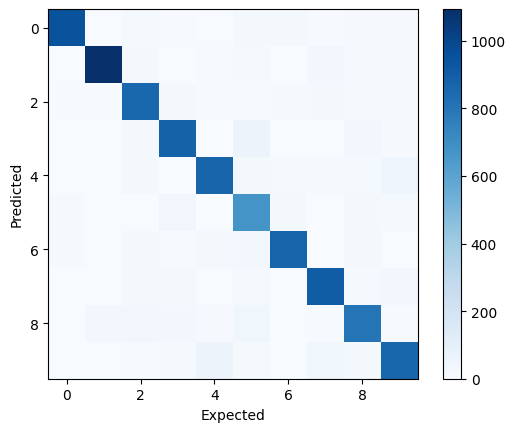

<Figure size 640x480 with 0 Axes>

In [ ]:
sum_MC2 = torch.sum(MC2)
print("Suma de la matriz de confusion: ", sum_MC2)
plt.imshow(MC2, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()
plt.savefig("Modelo3.jpg")
#model3 = torch.save(net2, 'model3.pth')

# **Red sin entrenamiento**

Suma de la matriz de confusion:  tensor(10000.)


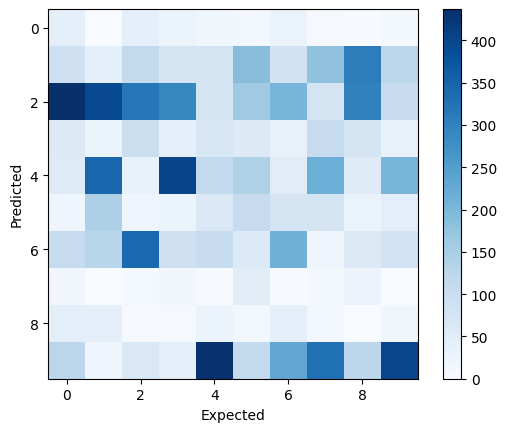

<Figure size 640x480 with 0 Axes>

In [ ]:
#RED NEURONAL SIN ENTRENAR
C3 = 1  # monochromatic images
H3 = 28  # 28 pixels per side
W3 = 28  # 28 pixels per side

n_inputs3 = C3*H3*W3  # total number of inputs is the total number of pixels
N13 = 600  # number of neurons in layer 1, the input layer
n_outputs3 = 10  # number of neurons at layer 2, the output layer

# let's build our network using a Sequential container
net3 = torch.nn.Sequential(
            torch.nn.Flatten(start_dim=1),  # start at 2nd dim to preserve the batch dim
            torch.nn.Linear(n_inputs3, N13),  # n_inputs connecting to N1 neurons
            torch.nn.Linear(N13, n_outputs3), # N1 outputs from last layer are inputs to this layer with n_outputs neurons
        )

#Criterio 4ta RED NEURONAL
criterion4 = torch.nn.CrossEntropyLoss()

#Optimizador de 3ra RED NEURONAL
optimizer4 = optim.SGD(net2.parameters(), lr=0.001)
#TEST
preds_hist3=[]
exp_hist3=[]
MC3=torch.zeros(10,10)
for batch_idx, data in enumerate(test_loader):  # consume the dataset, one batch at a time
        # get the inputs; data is a tuple of (inputs, labels)
        inputs, labels = data

        # do a forward pass
        outputs = net3(inputs)

        preds=torch.argmax(outputs,dim=1)
        preds_hist3.append(preds.detach())
        exp_hist3.append(labels.detach())

for i in range(len(preds_hist3)):
  for j in range(len(exp_hist3[i])):
    MC3[preds_hist3[i][j], exp_hist3[i][j]]+=1
#sum_MC2=torch.sum(MC2)
#print ("suma",sum_MC2)
MC3
sum_MC3 = torch.sum(MC3)
print("Suma de la matriz de confusion: ", sum_MC3)
plt.imshow(MC3, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()
plt.savefig("Modelo4.jpg")

# **Grafica de las 3 redes.**

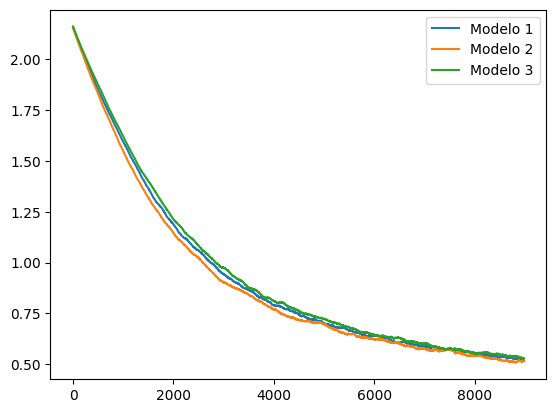

In [ ]:
#Graficar las 3 redes
window_size = 400
numbers_series = pd.Series(red01)

windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()

final_list = moving_averages_list[window_size - 1:]

numbers_series = pd.Series(red02)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()

final_list2 = moving_averages_list[window_size -1:]

numbers_series = pd.Series(red03)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()
final_list3 = moving_averages_list[window_size -1:]

plt.plot(final_list,label="Modelo 1")
plt.plot(final_list2,label="Modelo 2")
plt.plot(final_list3,label="Modelo 3")
plt.legend()
plt.show()